In [ ]:
from sklearn.model_selection import  train_test_split
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving csgo_games.csv to csgo_games.csv


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Nadam

In [ ]:
df = pd.read_csv('csgo_games.csv')

In [ ]:
df

,match_date,team_1,team_2,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner,...,t2_player5_dpr,t2_player5_spr,t2_player5_opk_ratio,t2_player5_opk_rating,t2_player5_wins_perc_after_fk,t2_player5_fk_perc_in_wins,t2_player5_multikill_perc,t2_player5_rating_at_least_one_perc,t2_player5_is_sniper,t2_player5_clutch_win_perc;;;;;;;;;
0,2016-12-18,CLOUD9,HELLRAISERS,13.0,16.0,9.0,20.0,0.500000,0.500000,t2,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,0.6666666666666661;;;;;;;;;
1,2016-12-18,IMMORTALS,G2,17.0,19.0,13.0,10.0,0.500000,0.500000,t2,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,0.40625000000000006;;;;;;;;;
2,2016-12-18,MOUSESPORTS,IMMORTALS,16.0,3.0,12.0,13.0,0.500000,0.500000,t1,...,0.67,0.07,0.79,0.94,0.723,0.129,0.148257,0.526,False,0.7333333333333331;;;;;;;;;
3,2016-12-18,DIGNITAS,G2,16.0,9.0,6.0,10.0,0.416667,0.583333,t1,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,0.40625000000000006;;;;;;;;;
4,2016-12-18,OPTIC,HELLRAISERS,16.0,10.0,4.0,20.0,0.500000,0.500000,t1,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,0.6666666666666661;;;;;;;;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,20.01.2020;;;;;;;;;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3797,21.01.2020;;;;;;;;;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3798,22.01.2020;;;;;;;;;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3799,23.01.2020;;;;;;;;;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
z=np.arange(0,171,1)
z

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170])

In [ ]:
df=df.iloc[:, [ 0,  1,   2,   3,   4,   5,   6,   7,   8,   169,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       9]]

In [ ]:
df

,match_date,team_1,team_2,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,t2_player5_clutch_win_perc;;;;;;;;;,...,t2_player5_dpr,t2_player5_spr,t2_player5_opk_ratio,t2_player5_opk_rating,t2_player5_wins_perc_after_fk,t2_player5_fk_perc_in_wins,t2_player5_multikill_perc,t2_player5_rating_at_least_one_perc,t2_player5_is_sniper,winner
0,2016-12-18,CLOUD9,HELLRAISERS,13.0,16.0,9.0,20.0,0.500000,0.500000,0.6666666666666661;;;;;;;;;,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,t2
1,2016-12-18,IMMORTALS,G2,17.0,19.0,13.0,10.0,0.500000,0.500000,0.40625000000000006;;;;;;;;;,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,t2
2,2016-12-18,MOUSESPORTS,IMMORTALS,16.0,3.0,12.0,13.0,0.500000,0.500000,0.7333333333333331;;;;;;;;;,...,0.67,0.07,0.79,0.94,0.723,0.129,0.148257,0.526,False,t1
3,2016-12-18,DIGNITAS,G2,16.0,9.0,6.0,10.0,0.416667,0.583333,0.40625000000000006;;;;;;;;;,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,t1
4,2016-12-18,OPTIC,HELLRAISERS,16.0,10.0,4.0,20.0,0.500000,0.500000,0.6666666666666661;;;;;;;;;,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,t1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,20.01.2020;;;;;;;;;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3797,21.01.2020;;;;;;;;;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3798,22.01.2020;;;;;;;;;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3799,23.01.2020;;;;;;;;;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop('match_date' ,axis=1, inplace=True) # удалим колонку id

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.drop('t2_player5_clutch_win_perc;;;;;;;;;',axis=1,inplace=True)

In [ ]:
team_code={'CLOUD9':0, 'IMMORTALS':1, 'MOUSESPORTS':2, 'DIGNITAS':3, 'OPTIC':4, 'FAZE':5,
       'NIP':6, 'GODSENT':7, 'G2':8, 'ENVY':9, 'ASTRALIS':10, 'SK':11, 'VIRTUS.PRO':12,
       'GAMBIT':13, 'FNATIC':14, 'HEROIC':15, 'LIQUID':16, 'NATUS VINCERE':17, 'TYLOO':18,
       'VG.CYBERZEN':19, 'FLIPSID3':20, 'ECHO FOX':21, 'X':22, 'TSM':23, 'LUMINOSITY':24,
       'HELLRAISERS':25, 'CLG':26, 'TEMPO STORM':27, 'SELFLESS':28, 'E-FRAG.NET':29,
       'AGG':30, 'RENEGADES':31, 'NORTH':32, 'SPACE SOLDIERS':33, 'UKRAINE':34, 'BIG':35,
       'PENTA':36, 'MISFITS':37, 'KINGUIN':38, 'LDLC':39, 'MIBR':40, 'NRG':41, 'COMPLEXITY':42,
       'ENCE':43, 'VEGA SQUADRON':44, 'AGO':45, 'VITALITY':46, 'EVIL GENIUSES':47,
       'FORZE':48, 'FURIA':49, '100 THIEVES':50, 'AVANGAR':51, 'TRICKED':52, 'CR4ZY':53,
       'SPROUT':54, 'GRAYHOUND':55, 'VALIANCE':56, 'WINDIGO':57, 'GHOST':58, 'OG':59,
       'SPIRIT':60, 'CHAOS':61, 'GEN.G':62, 'MAD LIONS':63,'QUANTUM BELLATOR FIRE':64,'RED RESERVE':65,'DREAMEATERS':66,'C0NTACT':67,'Bad News Eagles':68,'OONation':69}

df['team_1']=df['team_1'].replace(team_code)
df['team_2']=df['team_2'].replace(team_code)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,team_1,team_2,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,t1_player1_rating,t1_player1_impact,...,t2_player5_dpr,t2_player5_spr,t2_player5_opk_ratio,t2_player5_opk_rating,t2_player5_wins_perc_after_fk,t2_player5_fk_perc_in_wins,t2_player5_multikill_perc,t2_player5_rating_at_least_one_perc,t2_player5_is_sniper,winner
0,0.0,25,13.0,16.0,9.0,20.0,0.500000,0.500000,1.24,1.29,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,t2
1,1.0,8,17.0,19.0,13.0,10.0,0.500000,0.500000,1.21,1.24,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,t2
2,2.0,1,16.0,3.0,12.0,13.0,0.500000,0.500000,1.18,1.42,...,0.67,0.07,0.79,0.94,0.723,0.129,0.148257,0.526,False,t1
3,3.0,8,16.0,9.0,6.0,10.0,0.416667,0.583333,1.19,1.17,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,t1
4,4.0,25,16.0,10.0,4.0,20.0,0.500000,0.500000,1.19,1.21,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,t1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[['team_1',	'team_2',	't1_points'	,'t2_points',	't1_world_rank'	,'t2_world_rank',	't1_h2h_win_perc',	't2_h2h_win_perc',	'winner']][df[['team_1',	'team_2',	't1_points'	,'t2_points',	't1_world_rank'	,'t2_world_rank',	't1_h2h_win_perc',	't2_h2h_win_perc',	'winner']].values  == "?"]
df.drop(df.index[922], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df[['team_1',	'team_2',	't1_points'	,'t2_points',	't1_world_rank'	,'t2_world_rank',	't1_h2h_win_perc',	't2_h2h_win_perc',	'winner']][df[['team_1',	'team_2',	't1_points'	,'t2_points',	't1_world_rank'	,'t2_world_rank',	't1_h2h_win_perc',	't2_h2h_win_perc',	'winner']].values  == "draw"]


,team_1,team_2,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner
362,7.0,15,1.0,1.0,8.0,11.0,1.000000,0.000000,draw
391,13.0,20,1.0,1.0,17.0,15.0,0.500000,0.500000,draw
844,29.0,11,1.0,1.0,17.0,16.0,1.000000,0.000000,draw
866,20.0,29,1.0,1.0,14.0,17.0,0.750000,0.250000,draw
967,10.0,32,15.0,15.0,3.0,7.0,0.571429,0.428571,draw
973,32.0,8,15.0,15.0,7.0,5.0,0.375000,0.625000,draw
974,5.0,6,15.0,15.0,1.0,4.0,0.761905,0.238095,draw
976,9.0,12,15.0,15.0,14.0,8.0,0.625000,0.375000,draw
1327,32.0,13,1.0,1.0,4.0,5.0,0.888889,0.111111,draw
1354,15.0,33,1.0,1.0,16.0,19.0,0.500000,0.500000,draw


In [ ]:
df = df.drop (index=[ 362,391,844,866,967,973,974,1327,1354,1806,1927,1934,2032,2193,2591,2876,2967,3198,3230,3614,3615,3620,976,2965 ])
df[['team_1',	'team_2',	't1_points'	,'t2_points',	't1_world_rank'	,'t2_world_rank',	't1_h2h_win_perc',	't2_h2h_win_perc',	'winner']][df[['team_1',	'team_2',	't1_points'	,'t2_points',	't1_world_rank'	,'t2_world_rank',	't1_h2h_win_perc',	't2_h2h_win_perc',	'winner']].values  == "draw"]


,team_1,team_2,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()




In [ ]:
winner_code={'t1':0,'t2':1,}
df['winner']=df['winner'].replace(winner_code)
df
df['winner']=scaler.fit_transform(df[['winner']])
df

,team_1,team_2,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,t1_player1_rating,t1_player1_impact,...,t2_player5_dpr,t2_player5_spr,t2_player5_opk_ratio,t2_player5_opk_rating,t2_player5_wins_perc_after_fk,t2_player5_fk_perc_in_wins,t2_player5_multikill_perc,t2_player5_rating_at_least_one_perc,t2_player5_is_sniper,winner
0,0.0,25,13.0,16.0,9.0,20.0,0.500000,0.500000,1.24,1.29,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,1.0
1,1.0,8,17.0,19.0,13.0,10.0,0.500000,0.500000,1.21,1.24,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,1.0
2,2.0,1,16.0,3.0,12.0,13.0,0.500000,0.500000,1.18,1.42,...,0.67,0.07,0.79,0.94,0.723,0.129,0.148257,0.526,False,0.0
3,3.0,8,16.0,9.0,6.0,10.0,0.416667,0.583333,1.19,1.17,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,0.0
4,4.0,25,16.0,10.0,4.0,20.0,0.500000,0.500000,1.19,1.21,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
scaler2 = StandardScaler().fit(df)

df=scaler2.transform(df)


array([[-1.16975951,  0.52042455,  0.75440103, ...,  0.28762665,
         0.48755276, -0.37277953],
       [-1.09891179, -0.59347209,  1.33686521, ..., -0.44095739,
        -0.41352975,  2.68255073],
       [-1.02806407, -1.05213542,  1.19124916, ...,  0.3681821 ,
         0.4675287 , -0.37277953],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [ ]:
df['t1_world_rank']=scaler.fit_transform(df[['t1_world_rank']])
df['t2_world_rank']=scaler.fit_transform(df[['t2_world_rank']])



In [ ]:
df['team_1']=scaler.fit_transform(df[['team_1']])
df['team_2']=scaler.fit_transform(df[['team_2']])


In [ ]:

df.drop('t1_points' ,axis=1, inplace=True)
df.drop('t2_points' ,axis=1, inplace=True)


In [ ]:
df=df.dropna(how='all')  

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
df = df.iloc[:]

In [ ]:
df= df[np.isfinite(df).all(1)]

In [ ]:
X=df.iloc[:,:164].values
y=df.iloc[:,165].values
y

array([1., 1., 0., ..., 1., 1., 0.])

In [ ]:
df = df.dropna(how='any',axis=0) 

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


Epoch 1/200
188/188 [==============================] - 11s 2ms/step - loss: 0.4016 - mean_absolute_error: 0.4897
Epoch 2/200
188/188 [==============================] - 0s 2ms/step - loss: 0.3234 - mean_absolute_error: 0.4927
Epoch 3/200
188/188 [==============================] - 0s 2ms/step - loss: 0.3071 - mean_absolute_error: 0.4931
Epoch 4/200
188/188 [==============================] - 0s 2ms/step - loss: 0.2940 - mean_absolute_error: 0.4942
Epoch 5/200
188/188 [==============================] - 0s 2ms/step - loss: 0.2835 - mean_absolute_error: 0.4948
Epoch 6/200
188/188 [==============================] - 0s 2ms/step - loss: 0.2752 - mean_absolute_error: 0.4957
Epoch 7/200
188/188 [==============================] - 0s 2ms/step - loss: 0.2686 - mean_absolute_error: 0.4959
Epoch 8/200
188/188 [==============================] - 0s 2ms/step - loss: 0.2635 - mean_absolute_error: 0.4964
Epoch 9/200
188/188 [==============================] - 0s 2ms/step - loss: 0.2596 - mean_absolute_error

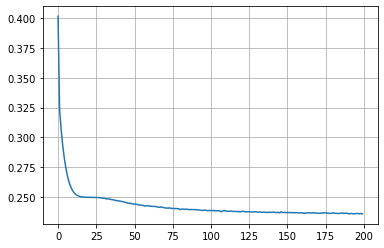

24/24 [==============================] - 0s 1ms/step


ValueError: ignored

In [ ]:
from numpy import * 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn import metrics
from numpy.random import *
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import Ridge
from sklearn import decomposition
from sklearn.preprocessing import LabelEncoder
X=df.iloc[:,:164]
y=df.iloc[:,165]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
model = Sequential([Dense(1, activation='sigmoid', input_shape=[164]),
        Dense(1, activation='linear', input_shape=[164])])

X_train = np.asarray(X_train).astype(np.float32)

y_train = np.asarray(y_train).astype(np.float32)

X_test = np.asarray(X_test).astype(np.float32)
model.compile(loss='mean_squared_error', optimizer=Nadam(lr=0.0001), metrics=['mean_absolute_error'])


history=model.fit(X_train, y_train, batch_size=16, epochs=200)




print(model.predict(X_test))
print(model.layers[0].get_weights())
plt.plot(history.history['loss'])
plt.grid(True)
plt.show()



#Выведем коэффициенты модели 
#Делаем прогноз
y_pred=model.predict(X_test)
#Сравним фактические значения с прогнозируемыми
df_new=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df_new)
#Оценка производительности алгоритма 
print('Mean sequared Error :',metrics.mean_squared_error(y_test,y_pred))

#Визуализируем резуьтат представления в гистограммы 





In [ ]:

res = model.predict(X_test, verbose = 0)
res

array([[0.12583274],
       [0.12583213],
       [0.12582833],
       [0.12582381],
       [0.12580527],
       [0.1258327 ],
       [0.12582156],
       [0.12583277],
       [0.12583156],
       [0.12583227],
       [0.12583275],
       [0.12580308],
       [0.12583277],
       [0.12583265],
       [0.12583278],
       [0.12583278],
       [0.12583256],
       [0.125831  ],
       [0.12583089],
       [0.125828  ],
       [0.12583277],
       [0.1258324 ],
       [0.1258326 ],
       [0.12583278],
       [0.12583023],
       [0.12583219],
       [0.12583174],
       [0.12583272],
       [0.12583093],
       [0.12583238],
       [0.12583262],
       [0.12583277],
       [0.12582071],
       [0.1256073 ],
       [0.12583275],
       [0.12583277],
       [0.12582584],
       [0.12583162],
       [0.12583277],
       [0.1258264 ],
       [0.12583022],
       [0.12583227],
       [0.12583128],
       [0.12583153],
       [0.12583092],
       [0.12582159],
       [0.12583205],
       [0.125

In [ ]:
detres=detres.reshape(1,752).T
print(detres)

[[ 1.04442739e+00]
 [ 1.41806901e-04]
 [-9.39756632e-04]
 [-9.40449536e-04]
 [ 2.21536651e-01]
 [ 5.60454011e-01]
 [ 5.20884991e-04]
 [-9.22739506e-04]
 [ 1.04563797e+00]
 [ 4.99175489e-02]
 [ 5.93607128e-03]
 [ 2.61003524e-03]
 [ 2.16803625e-02]
 [-9.38341022e-04]
 [ 2.43613645e-02]
 [-8.56295228e-04]
 [ 4.06902730e-02]
 [ 3.07334363e-02]
 [ 5.58751822e-03]
 [ 9.68232930e-01]
 [-9.13314521e-04]
 [-9.24780965e-04]
 [ 8.51401240e-02]
 [ 1.84907764e-02]
 [ 3.29773873e-03]
 [ 3.89842689e-03]
 [ 3.14136595e-03]
 [ 2.96339765e-02]
 [-9.16734338e-04]
 [-9.30301845e-04]
 [ 9.23035324e-01]
 [-8.39821994e-04]
 [-8.02427530e-04]
 [-8.11837614e-04]
 [-7.46682286e-04]
 [-5.30458987e-04]
 [-9.39406455e-04]
 [-8.98830593e-04]
 [ 1.35496110e-01]
 [-9.40248370e-04]
 [-7.68207014e-04]
 [ 4.45130467e-03]
 [ 2.85487622e-03]
 [-9.16607678e-04]
 [-8.50662589e-04]
 [-9.40516591e-04]
 [-8.94591212e-04]
 [-6.61447644e-04]
 [-5.44540584e-04]
 [-9.26844776e-04]
 [-9.21666622e-04]
 [-8.50953162e-04]
 [-9.2635303

In [ ]:
from sklearn import metrics
print('Mean Squered Error:',metrics.mean_squared_error(model.predict(X_test),y_test))
print('abs err',metrics.mean_absolute_error(model.predict(X_test),y_test))

24/24 [==============================] - 0s 1ms/step
Mean Squered Error: 0.23911803093953324
24/24 [==============================] - 0s 2ms/step
abs err 0.4755312369224873


In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 0.11569148936170212


In [ ]:
from sklearn.svm import SVR

In [ ]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(X_train1, y_train1.ravel())

SVR(gamma='auto')

In [ ]:
print("Правильность на обучающем наборе: {:.2f}".format(svr_regressor.score(X_train1, y_train1)))
print("Правильность на тестовом наборе: {:.2f}".format(svr_regressor.score(X_test1,y_test1)))


Правильность на обучающем наборе: 0.75
Правильность на тестовом наборе: -0.10


In [ ]:
y_predskaz[y_predskaz>0.500000]=1
y_predskaz[y_predskaz<0.500000]=0

In [ ]:
y_pred[y_pred > 0.500000] = 1

In [ ]:
y_pred[y_pred<0.500000]=0

In [ ]:

#Сравним фактические значения с прогнозируемыми
df_new=pd.DataFrame({'Actual':y_test1,'Predicted':y_pred})
print(df_new)
#Оценка производительности алгоритма 
print('Mean sequared Error :',metrics.mean_squared_error(y_test1,y_pred))

#Визуализируем резуьтат представления в гистограммы 


ValueError: ignored

In [ ]:
count=0
#Перебираем все объекты из текса 
for i in range(len(y_test)):
  #Если предсказание не верное 
  if np.array(y_test)[i]!=y_pred[i]:
 
    count=count+1
    #Качество модели (доля правильно классифицированных точек)
    from sklearn.metrics import  accuracy_score


print('Кол-во не верных значений = ',count)

Кол-во не верных значений =  752


In [ ]:
#Сравним фактические значения с прогнозируемыми
df_new1=pd.DataFrame({'Actual':y_test1,'Predicted':y_predskaz})
print(df_new1)
#Оценка производительности алгоритма 
print('Mean sequared Error :',metrics.mean_squared_error(y_test1,y_predskaz))

      Actual  Predicted
533      0.0        1.0
413      0.0        0.0
565      1.0        0.0
2745     0.0        0.0
2379     0.0        0.0
...      ...        ...
2767     1.0        0.0
931      0.0        0.0
17       1.0        0.0
3523     1.0        0.0
3057     0.0        0.0

[752 rows x 2 columns]
Mean sequared Error : 0.5132978723404256


In [ ]:
count1=0
#Перебираем все объекты из текса 
for i in range(len(y_test)):
  #Если предсказание не верное 
  if np.array(y_test1)[i]!=y_predskaz[i]:
 
    count1=count1+1
    #Качество модели (доля правильно классифицированных точек)
    from sklearn.metrics import  accuracy_score


print('Кол-во не верных значений = ',count1)

Кол-во не верных значений =  386


In [ ]:
X_train4, X_test4, y_train4,  y_test4=train_test_split(
df.iloc[:,:165], #Возьмем все колонки кроме последней в признаки
df.iloc[:,165], #Последнюю  в целевую переменную (берем как класс)
test_size=0.20 #Размер тестовой выборки 20%
)

Y-Предсказание =  [0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.

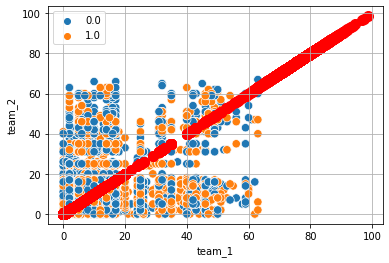

In [ ]:

#Обучим модель трех ближних соседий 
model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=413)
model.fit(X_train4, y_train4)
#Получаем предсказание модели 
y_pred4=model.predict(X_test4)
print('Y-Предсказание = ',y_pred4)
#Пркажем на графике что отражает полученное число 
sns.scatterplot(
    data=df, #Из этой таблици рисуем точки
    x='team_1',y='team_2', #Коордитнаты 
    hue='winner', #Для которых цвет определить согласно этому столбцу
    s=70 #Размер точек 
)
count=0
plt.xlabel('team_1')
plt.ylabel('team_2')
plt.legend(loc=2) #Добавить легенду
plt.grid() #Добавить 
error_rates=[]
#Краным цветом обозначенный точки для которых классификация сработала не верно 


#Перебираем все объекты из текса 
for i in range(len(y_test4)):
  #Если предсказание не верное 
  if np.array(y_test4)[i]!=y_pred4[i]:
    #То подсвечиваем точки красным 
    plt.scatter(X_test4.iloc[i],X_test4.iloc[i],color='red',s=100)
    count=count+1
    #Качество модели (доля правильно классифицированных точек)
    from sklearn.metrics import  accuracy_score
print(f'accuracy:{accuracy_score(y_test4,y_pred4) :.4}')

print('Кол-во не верных значений = ',count)
cm=confusion_matrix(y_test4,y_pred4)
ac=accuracy_score(y_test4,y_pred4)
print(cm)

In [ ]:
from sklearn import decomposition

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import roc_auc_score 
X_train5, X_test5, y_train5,  y_test5=train_test_split(
df.iloc[:,:165], #Возьмем все колонки кроме последней в признаки
df.iloc[:,165], #Последнюю  в целевую переменную (берем как класс)
test_size=0.20 #Размер тестовой выборки 20%
)
# далее - (X, y) - для обучения, (X2, y2) - для контроля
# модель - регрессор 
model =  RandomForestRegressor(n_estimators=100,                              
                               oob_score=True,
                               random_state=1) 
model.fit(X_train5, y_train5) # обучение 
a = model.predict(X_test5) # предсказание  
print ("AUC-ROC (oob) = ", roc_auc_score(y_train5, model.oob_prediction_)) 
print ("AUC-ROC (test) = ", roc_auc_score(y_test5, a))

AUC-ROC (oob) =  0.5757753751071988
AUC-ROC (test) =  0.6353415103415103


AttributeError: ignored